## Estudo dirigido de Economia Regional

1.Em quais estados brasileiros estão concentrados o emprego? Comparando com os EUA, a concentração do emprego é maior ou menor (dados disponíveis na SIDRA-IBGE RAIS e na PNAD)

2.Qual a percentagem da população brasileira, em 2018 vivia nos estados que detêm a maior parcela do emprego? Fazer um gráfico mostrando como vem sendo esta evolução de 1999 ate 2019.

3.Quais e quantos são os estados brasileiros cujo PIB per capita é inferior a 75% do PIB nacional em 2019? Qual a percentagem da população brasileira vivi nestes estados em 2019?

4.Faça um gráfico do PIB per capita das 5 macro regiões brasileiras (Norte, Nordeste, Sul, Sudeste e Centro Oeste) entre 1996 a 2021. Identifique se existiu redução da desigualdade.

5.Faça um mapa do Brasil para os itens abaixo e compare os resultados:
- taxas de desemprego
- PIB industrial per capita
 

6.Faça um mapa do Brasil para, para os itens abaixo e compare os resultados:
- Índice de Gini
- renda per capita

### Importar planilhas e tratar dados

In [4]:
# bibliotecas usadas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tabulate import tabulate
import geopandas as gpd

In [5]:
pop_residente_regiao = pd.read_csv('M:\{estudos}\Python\Estudos-Python\Análise de Dados\Estudo dirigido - Economia regional\populacao residente por regiao (1996-2021).csv', sep=';')
pop_residente_estado = pd.read_csv('M:\{estudos}\Python\Estudos-Python\Análise de Dados\Estudo dirigido - Economia regional\populacao residente por estado (1999-2019).csv', sep=';')
pib_per_capita = pd.read_csv('M:\{estudos}\Python\Estudos-Python\Análise de Dados\Estudo dirigido - Economia regional\pib estadual per capita (1996-2021).csv', sep=';')
pib_industrial2021 = pd.read_csv('M:\{estudos}\Python\Estudos-Python\Análise de Dados\Estudo dirigido - Economia regional\pib estadual industrial 2021.csv', sep=';')
pop_empregados = pd.read_csv('M:\{estudos}\Python\Estudos-Python\Análise de Dados\Estudo dirigido - Economia regional\populacao empregada (2012-2019).csv', sep=';')
taxa_desocupacao = pd.read_csv(r'M:\{estudos}\Python\Estudos-Python\Análise de Dados\Estudo dirigido - Economia regional\taxa de desocupação 2021.csv', sep=';')


<>:1: SyntaxWarning: invalid escape sequence '\{'
<>:2: SyntaxWarning: invalid escape sequence '\{'
<>:3: SyntaxWarning: invalid escape sequence '\{'
<>:4: SyntaxWarning: invalid escape sequence '\{'
<>:5: SyntaxWarning: invalid escape sequence '\{'
<>:1: SyntaxWarning: invalid escape sequence '\{'
<>:2: SyntaxWarning: invalid escape sequence '\{'
<>:3: SyntaxWarning: invalid escape sequence '\{'
<>:4: SyntaxWarning: invalid escape sequence '\{'
<>:5: SyntaxWarning: invalid escape sequence '\{'
C:\Users\Maria Eduarda\AppData\Local\Temp\ipykernel_6656\3845850931.py:1: SyntaxWarning: invalid escape sequence '\{'
  pop_residente_regiao = pd.read_csv('M:\{estudos}\Python\Estudos-Python\Análise de Dados\Estudo dirigido - Economia regional\populacao residente por regiao (1996-2021).csv', sep=';')
C:\Users\Maria Eduarda\AppData\Local\Temp\ipykernel_6656\3845850931.py:2: SyntaxWarning: invalid escape sequence '\{'
  pop_residente_estado = pd.read_csv('M:\{estudos}\Python\Estudos-Python\Análise

### Questões propostas

#### 1. Em quais estados brasileiros estão concentrados o emprego? Comparando com os EUA, a concentração do emprego é maior ou menor (dados disponíveis na SIDRA-IBGE RAIS e na PNAD)

5. Faça um mapa do Brasil para os itens abaixo e compare os resultados:
- taxas de desemprego
- PIB industrial per capita



6. Faça um mapa do Brasil para, para os itens abaixo e compare os resultados:
- Índice de Gini
- renda per capita

In [6]:
pop_empregada_long = pop_empregados.melt(id_vars='estado', var_name='ano', value_name='pop_empregada')
pop_residente_long = pop_residente_estado.melt(id_vars='estado', var_name='ano', value_name='pop_residente')

# Limpar e converter tipos de dados
pop_empregada_long['ano'] = pop_empregada_long['ano'].astype(int)
pop_empregada_long['pop_empregada'] = pop_empregada_long['pop_empregada'].astype(str)
pop_empregada_long['pop_empregada'] = pop_empregada_long['pop_empregada'].str.replace(',', '.').astype(float)
pop_empregada_long['pop_empregada'] *= 1000

pop_residente_long['ano'] = pop_residente_long['ano'].astype(int)
pop_residente_long['pop_residente'] = pop_residente_long['pop_residente'].astype(str)
pop_residente_long['pop_residente'] = (
    pop_residente_long['pop_residente']
    .str.replace('.', '', regex=False)   # Remove separador de milhar
    .str.replace(',', '.', regex=False)  # Troca vírgula decimal por ponto
    .astype(float)
)

In [7]:
# Juntar os dois DataFrames por estado e ano
df_emprego = pd.merge(pop_empregada_long, pop_residente_long, on=['estado', 'ano'])

# Taxa de emprego por estado
df_emprego['taxa_emprego'] = df_emprego['pop_empregada'] / df_emprego['pop_residente']

# Concentração do emprego por estado (em % do total nacional)
total_emprego_por_ano = df_emprego.groupby('ano')['pop_empregada'].sum().reset_index(name='total_empregada')
df_emprego = df_emprego.merge(total_emprego_por_ano, on='ano')
df_emprego['concentracao_emprego'] = (df_emprego['pop_empregada'] / df_emprego['total_empregada']) * 100

df_2018 = df_emprego[df_emprego['ano'] == 2018].sort_values(by='concentracao_emprego', ascending=False)

# Estados com maior concentração de emprego
print(df_2018[['estado',  'taxa_emprego', 'concentracao_emprego', 'pop_empregada', 'pop_residente']].to_string(index=False))


             estado  taxa_emprego  concentracao_emprego  pop_empregada  pop_residente
          São Paulo      0.484684             24.364720     22072000.0     45538936.0
       Minas Gerais      0.462771             10.748427      9737000.0     21040662.0
     Rio de Janeiro      0.438463              8.305552      7524000.0     17159960.0
              Bahia      0.380892              6.228060      5642000.0     14812617.0
             Paraná      0.481455              6.031571      5464000.0     11348937.0
  Rio Grande do Sul      0.475656              5.948780      5389000.0     11329605.0
     Santa Catarina      0.507668              3.965118      3592000.0      7075494.0
         Pernambuco      0.371935              3.898885      3532000.0      9496294.0
              Ceará      0.386970              3.876808      3512000.0      9075649.0
              Goiás      0.478821              3.658240      3314000.0      6921161.0
               Pará      0.374934              3.52356

##### Os 5 estados brasileiros com maior concentração em 2018

In [8]:
top_5 = df_2018[['estado', 'taxa_emprego']].copy()
top_5['taxa_emprego'] = (top_5['taxa_emprego'] * 100).round(2).astype(str) + '%' # transforma em porcentagem
top_5 = top_5.sort_values(by='taxa_emprego', ascending=False).head(5)

print(tabulate(top_5, headers='keys', tablefmt='fancy_grid', showindex=False))


╒══════════════════╤════════════════╕
│ estado           │ taxa_emprego   │
╞══════════════════╪════════════════╡
│ Santa Catarina   │ 50.77%         │
├──────────────────┼────────────────┤
│ São Paulo        │ 48.47%         │
├──────────────────┼────────────────┤
│ Paraná           │ 48.15%         │
├──────────────────┼────────────────┤
│ Distrito Federal │ 47.97%         │
├──────────────────┼────────────────┤
│ Goiás            │ 47.88%         │
╘══════════════════╧════════════════╛


De acordo com o Bareau of Labor Statistics os  5 Estados dos EUA por Taxa de Emprego-População em 2018
| Estado       | Taxa de Emprego-População (%) |                                                                    |
| ------------ | ----------------------------- | ------------------------------------------------------------------ |
| Minnesota    | 67,8%                         |                                                                    |
| North Dakota | 67,7%                         |                                                                    |
| Nebraska     | 67,3%                         |                                                                    |
| Colorado     | 66,9%                         |                                                                    |
| Iowa         | 66,7%                         | |





Semelhanças: Tanto nos EUA quanto no Brasil, os estados com maior taxa de emprego-população estão acima de 63%, indicando uma concentração significativa de empregos.

Diferenças: Nos EUA, os estados líderes superam 66%, enquanto no Brasil, apenas Santa Catarina atinge uma taxa semelhante.


#### 2. Qual a percentagem da população brasileira, em 2018 vivia nos estados que detêm a maior parcela do emprego? Fazer um gráfico mostrando como vem sendo esta evolução de 1999 ate 2019.

In [9]:
top_emprego = df_2018.sort_values(by='concentracao_emprego', ascending=False).head(5)
pop_top5 = top_emprego['pop_residente'].sum()
pop_brasil = df_2018['pop_residente'].sum()
percentual_pop_nos_top5 = (pop_top5 / pop_brasil) * 100
print(f"{percentual_pop_nos_top5:.2f}% da população brasileira vivia nos 5 estados com maior concentração de emprego em 2018.")


52.71% da população brasileira vivia nos 5 estados com maior concentração de emprego em 2018.


In [10]:
pop_residente_estado.head()

,estado,1999,2000,2001,2002,2003,2004,2005,2006,2007,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Acre,527.937,541.873,574.355,586.942,600.595,630.328,669.736,686.652,688.892,...,718.759,746.386,758.786,776.463,790.101,803.513,816.687,829.619,869.265,881.935
1,Alagoas,2.713.203,2.738.378,2.856.629,2.887.535,2.917.664,2.980.910,3.015.912,3.050.652,3.103.380,...,3.149.746,3.143.384,3.165.472,3.300.935,3.321.730,3.340.932,3.358.963,3.375.823,3.322.820,3.337.357
2,Amazonas,2.580.860,2.641.251,2.900.240,2.961.801,3.031.068,3.138.726,3.232.330,3.311.026,3.352.198,...,3.465.878,3.538.387,3.590.985,3.807.921,3.873.743,3.938.336,4.001.667,4.063.614,4.080.611,4.144.597
3,Amapá,439.781,458.796,498.735,516.511,534.835,547.400,594.587,615.715,621.162,...,655.459,684.309,698.602,734.996,750.912,766.679,782.295,797.722,829.494,845.731
4,Bahia,12.993.011,13.135.262,13.214.114,13.323.212,13.435.612,13.682.074,13.815.334,13.950.146,14.293.755,...,14.367.449,14.097.534,14.175.341,15.044.137,15.126.371,15.203.334,15.276.566,15.344.447,14.812.617,14.873.064


In [11]:
top5_estados = top_emprego['estado'].tolist()

# Filtra população apenas desses estados no dataframe de população por estado
df_top5 = pop_residente_estado[pop_residente_estado['estado'].isin(top5_estados)]

# Lista dos anos como string, para usar como colunas
anos = [str(ano) for ano in range(1999, 2020)]

# Converte para numérico só para garantir
for ano in anos:
    pop_residente_estado[ano] = pd.to_numeric(pop_residente_estado[ano], errors='coerce')
    df_top5[ano] = pd.to_numeric(df_top5[ano], errors='coerce')

# Soma a população dos 5 estados para cada ano
pop_top5_ano = df_top5[anos].sum()

# Soma a população total (todos os estados) para cada ano
pop_total_ano = pop_residente_estado[anos].sum()

# Calcula o percentual de população nos top 5 estados em cada ano
percentual_top5 = (pop_top5_ano / pop_total_ano) * 100


C:\Users\Maria Eduarda\AppData\Local\Temp\ipykernel_6656\2951552551.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top5[ano] = pd.to_numeric(df_top5[ano], errors='coerce')



#### 3. Quais e quantos são os estados brasileiros cujo PIB per capita é inferior a 75% do PIB nacional em 2019? Qual a percentagem da população brasileira vive nestes estados em 2019?

In [12]:
ano = '2019'

# Converter as colunas para numérico (tirar vírgulas e transformar em float)
def converter_para_numero(df, col_ano):
    df[col_ano] = (
        df[col_ano]
        .astype(str)
        .str.replace('.', '', regex=False)   # remove pontos de milhar
        .str.replace(',', '.', regex=False)  # substitui vírgula decimal por ponto
        .astype(float)
    )
    return df

pib_per_capita = converter_para_numero(pib_per_capita, ano)
pop_residente_estado = converter_para_numero(pop_residente_estado, ano)

# Calcular PIB per capita nacional (média ponderada pela população?)
# Como você só tem PIB per capita por estado, uma forma simples: média ponderada pelo população dos estados

# Para isso, precisamos dos dados de população para 2019
pop_residente_estado[ano] = pd.to_numeric(pop_residente_estado[ano], errors='coerce')

# Unir PIB per capita e população por estado para 2019
df_pib_pop = pd.merge(
    pib_per_capita[['estado', ano]],
    pop_residente_estado[['estado', ano]],
    on='estado',
    suffixes=('_pib', '_pop')
)

# Calcular o PIB total por estado = PIB per capita * população
df_pib_pop['pib_total_estado'] = df_pib_pop[f'{ano}_pib'] * df_pib_pop[f'{ano}_pop']

# PIB total nacional
pib_total_nacional = df_pib_pop['pib_total_estado'].sum()

# População total nacional
pop_total_nacional = df_pib_pop[f'{ano}_pop'].sum()

# PIB per capita nacional ponderado pela população
pib_per_capita_nacional = pib_total_nacional / pop_total_nacional

print(f"PIB per capita nacional em {ano}: R$ {pib_per_capita_nacional:.2f}")

PIB per capita nacional em 2019: R$ 11.42


In [13]:
# Filtrar estados com PIB per capita inferior a 75% do PIB nacional
limite = 0.75 * pib_per_capita_nacional
estados_baixo_pib = df_pib_pop[df_pib_pop[f'{ano}_pib'] < limite]

# Quantidade de estados
quantidade_estados = estados_baixo_pib.shape[0]

# Soma da população desses estados
pop_estados_baixo_pib = estados_baixo_pib[f'{ano}_pop'].sum()

# Percentual da população nacional que vive nesses estados
percentual_pop = (pop_estados_baixo_pib / pop_total_nacional) * 100

print(f"\nEstados com PIB per capita inferior a 75% do PIB nacional em {ano}:")
print(estados_baixo_pib['estado'].to_list())

print(f"\nQuantidade de estados: {quantidade_estados}")
print(f"Percentual da população brasileira vivendo nesses estados em {ano}: {percentual_pop:.2f}%")


Estados com PIB per capita inferior a 75% do PIB nacional em 2019:
['Maranhão']

Quantidade de estados: 1
Percentual da população brasileira vivendo nesses estados em 2019: 0.00%


#### 4. Faça um gráfico do PIB per capita das 5 macro regiões brasileiras (Norte, Nordeste, Sul, Sudeste e Centro Oeste) entre 1996 a 2021. Identifique se existiu redução da desigualdade.

In [14]:
regioes = {
    'Norte': ['Acre', 'Amapá', 'Amazonas', 'Pará', 'Rondônia', 'Roraima', 'Tocantins'],
    'Nordeste': ['Alagoas', 'Bahia', 'Ceará', 'Maranhão', 'Paraíba', 'Pernambuco', 'Piauí', 'Rio Grande do Norte', 'Sergipe'],
    'Centro-Oeste': ['Distrito Federal', 'Goiás', 'Mato Grosso', 'Mato Grosso do Sul'],
    'Sudeste': ['Espírito Santo', 'Minas Gerais', 'Rio de Janeiro', 'São Paulo'],
    'Sul': ['Paraná', 'Rio Grande do Sul', 'Santa Catarina']
}

# 2. Carregar dados do PIB per capita
pib_pc = pd.read_csv(r'M:\{estudos}\Python\Estudos-Python\Análise de Dados\Estudo dirigido - Economia regional\pib estadual per capita (1996-2021).csv', sep=';')

# 3. Corrigir vírgulas e converter colunas numéricas
anos = [str(ano) for ano in range(1996, 2022)]
for ano in anos:
    pib_pc[ano] = pib_pc[ano].str.replace('.', '').str.replace(',', '.').astype(float)

# 4. Adicionar coluna de região
def identificar_regiao(estado):
    for regiao, estados in regioes.items():
        if estado in estados:
            return regiao
    return None

pib_pc['regiao'] = pib_pc['estado'].apply(identificar_regiao)

# 5. Agrupar por região e ano: média simples
df_regional = pib_pc.groupby('regiao')[anos].mean().transpose()
df_regional.index = df_regional.index.astype(int)


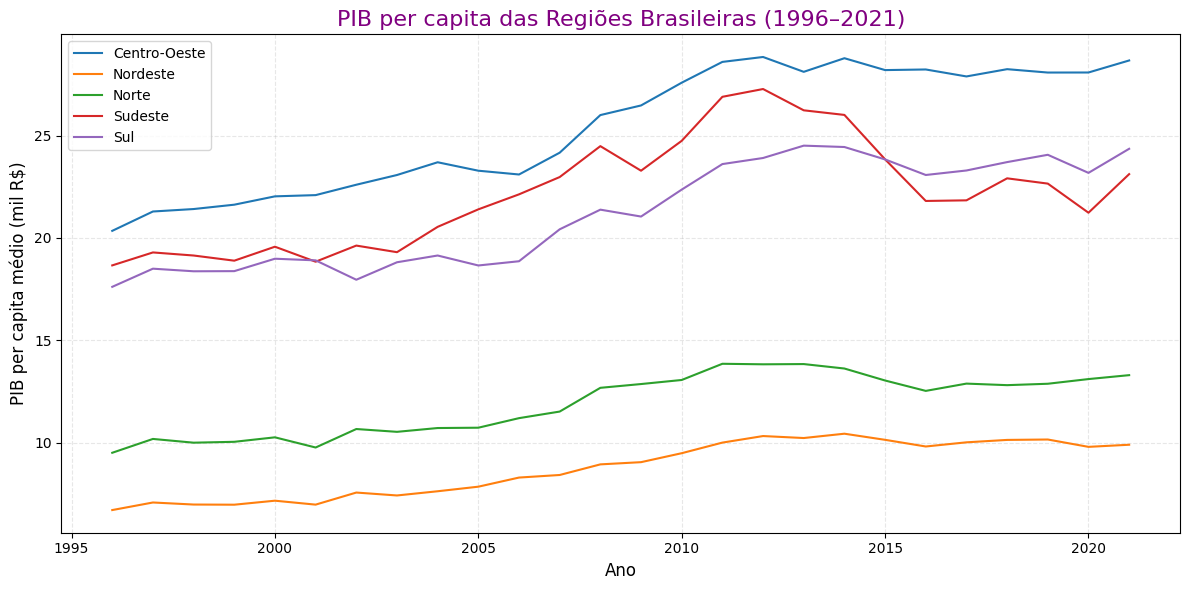

In [15]:
# 6. Plotar gráfico
plt.figure(figsize=(12, 6))
for regiao in df_regional.columns:
    plt.plot(df_regional.index, df_regional[regiao], label=regiao)

plt.title('PIB per capita das Regiões Brasileiras (1996–2021)', fontsize=16, color='purple')
plt.xlabel('Ano', fontsize=12)
plt.ylabel('PIB per capita médio (mil R$)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()


quinta questão

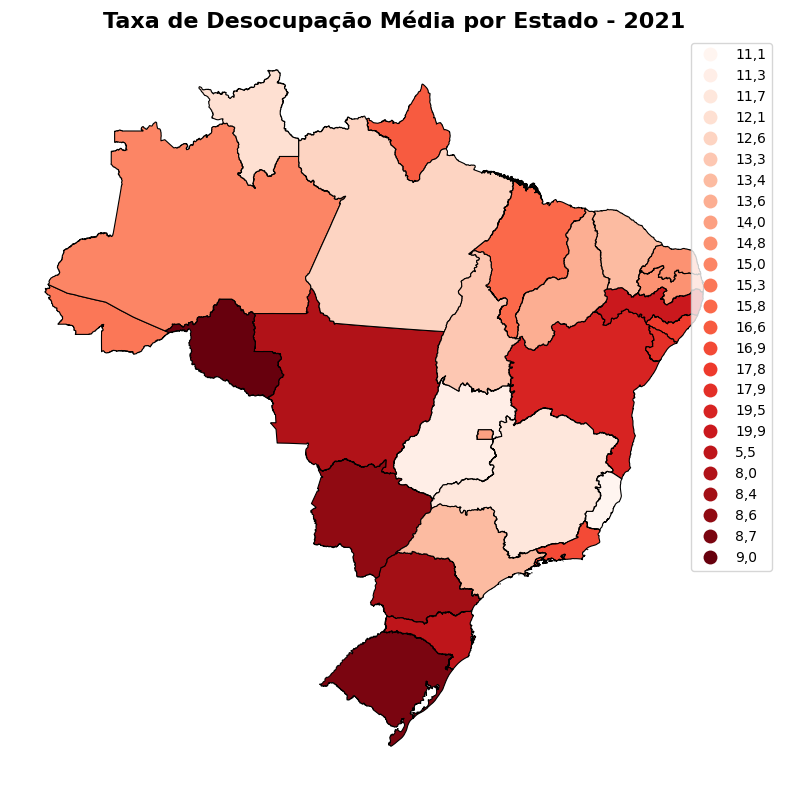

In [16]:
taxa_desocupacao['estado'] = taxa_desocupacao['estado'].str.strip()

# 3. Carregar o shapefile com os estados brasileiros
# Você pode usar um shapefile oficial do IBGE ou usar este embutido do geopandas
brasil_estados = gpd.read_file('https://raw.githubusercontent.com/codeforamerica/click_that_hood/master/public/data/brazil-states.geojson')

# 4. Conferir se os nomes dos estados batem entre os datasets
# Padronizar os nomes para facilitar o merge
taxa_desocupacao['estado'] = taxa_desocupacao['estado'].str.lower()
brasil_estados['name'] = brasil_estados['name'].str.lower()

# 5. Juntar os dados de desocupação com o mapa
mapa = brasil_estados.merge(taxa_desocupacao, left_on='name', right_on='estado')

# 6. Plotar o mapa
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
mapa.plot(column='2021', cmap='Reds', linewidth=0.8, edgecolor='black', legend=True, ax=ax)

ax.set_title('Taxa de Desocupação Média por Estado - 2021', fontsize=16, fontweight='bold')
ax.axis('off')

plt.tight_layout()
plt.show()